###         **NLP Project for Disaster Tweet Classification**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nlp_data=pd.read_csv('twitter_disaster.csv')

In [4]:
nlp_data

id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1  
7611  Police investigating after an e-bike collided ...       1  
7612  The Latest: More Homes Razed by Northern Calif...       1  

[7613 rows x 5 columns]

In [5]:
nlp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
nlp_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
nlp_data['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [8]:
nlp_data['location'].unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [9]:
nlp_data.describe().round(2)

id   target
count   7613.00  7613.00
mean    5441.93     0.43
std     3137.12     0.50
min        1.00     0.00
25%     2734.00     0.00
50%     5408.00     0.00
75%     8146.00     1.00
max    10873.00     1.00

### Replacing the Null Values to object columns

In [10]:
nlp_data['location'].fillna('Unknown', inplace=True)
nlp_data['keyword'].fillna('NotAvailable', inplace=True)

### Class Distribution

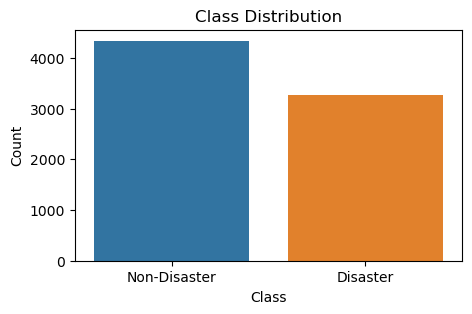

In [11]:
plt.figure(figsize=(5,3))
sns.countplot(x='target', data=nlp_data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0,1],['Non-Disaster','Disaster'])
plt.show()

### Filter disaster tweet

In [12]:
disaster_tweets=nlp_data[nlp_data['target']==1]['text']

In [13]:
disaster_tweets

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3271, dtype: object

### Tokenize and count word frequencies

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pooji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
from collections import Counter
from nltk.tokenize import word_tokenize

disaster_tweets = nlp_data[nlp_data['target']==1] ['keyword']
word_freq=Counter()

for tweet in disaster_tweets:
    if pd.notnull(tweet):
        tokens = word_tokenize(tweet.lower())
        word_freq.update(tokens)

print(word_freq)


Counter({'%': 708, 'suicide': 94, '20fires': 72, 'buildings': 52, '20storm': 50, '20disaster': 49, 'mass': 47, 'emergency': 46, 'nuclear': 45, '20fire': 43, 'notavailable': 42, 'forest': 42, 'derailment': 39, 'outbreak': 39, 'wreckage': 39, 'debris': 37, 'oil': 37, '20spill': 37, 'typhoon': 37, 'fire': 33, 'evacuated': 32, 'rescuers': 32, '20bomb': 32, '20bombing': 32, 'burning': 31, 'razed': 31, 'airplane': 30, '20accident': 30, 'earthquake': 30, '20bomber': 30, 'bridge': 29, '20collapse': 29, 'collision': 29, 'wildfire': 29, '20on': 28, 'casualties': 28, 'drought': 28, 'evacuation': 28, '20murder': 28, 'sandstorm': 28, 'bombing': 27, 'devastation': 27, 'hostages': 27, 'sinkhole': 27, 'wild': 27, 'deaths': 26, 'derailed': 26, 'displaced': 26, 'famine': 26, 'fatal': 26, 'fatalities': 26, 'floods': 26, 'thunderstorm': 26, 'violent': 26, 'wounded': 26, 'attack': 25, 'evacuate': 25, 'flooding': 25, 'heat': 25, '20wave': 25, 'massacre': 25, 'accident': 24, '20burning': 24, 'dust': 24, 'hai

### Frequency of phrases 

In [16]:
from collections import Counter
import re

# Function to preprocess text and extract phrases
def extract_phrases(text, n=3):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and convert to lowercase
    words = text.split()
    phrases = [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]
    return phrases

# Apply the function to the disaster tweets
disaster_tweets['phrases'] = nlp_data['text'].apply(extract_phrases)

# Flatten the list of phrases
all_phrases = [phrase for sublist in disaster_tweets['phrases'] for phrase in sublist]

# Count the frequency of each phrase
phrase_freq = Counter(all_phrases)

# Get the top 20 phrases
top_phrases = phrase_freq.most_common(20)

top_phrases

C:\Users\pooji\AppData\Local\Temp\ipykernel_18308\1905654878.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disaster_tweets['phrases'] = nlp_data['text'].apply(extract_phrases)


[('i liked a', 42),
 ('liked a youtube', 42),
 ('a youtube video', 42),
 ('northern california wildfire', 29),
 ('more homes razed', 29),
 ('homes razed by', 29),
 ('the latest more', 28),
 ('latest more homes', 28),
 ('razed by northern', 28),
 ('pkk suicide bomber', 28),
 ('suicide bomber who', 28),
 ('bomber who detonated', 28),
 ('who detonated bomb', 28),
 ('detonated bomb in', 28),
 ('by northern california', 27),
 ('16yr old pkk', 27),
 ('old pkk suicide', 27),
 ('families to sue', 26),
 ('to sue over', 26),
 ('sue over legionnaires', 26)]

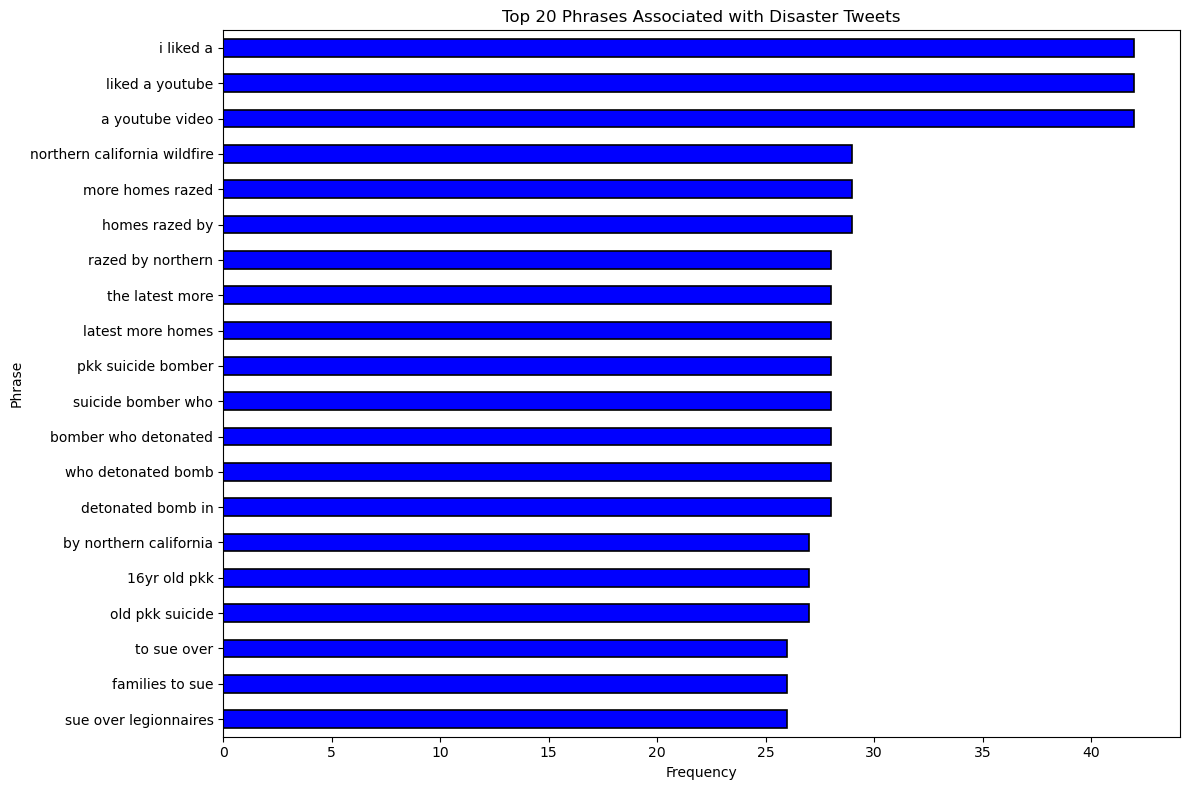

In [17]:
# Plot the top 20 phrases
plt.figure(figsize=(12, 8))
pd.Series(dict(top_phrases)).sort_values().plot(kind='barh', color='blue', edgecolor='black', linewidth=1.2)
plt.title('Top 20 Phrases Associated with Disaster Tweets')
plt.xlabel('Frequency')
plt.ylabel('Phrase')
plt.tight_layout()
plt.show()

### Find Special Characters in dataset

In [18]:
import re

def find_special_characters(text):
    special_characters = re.findall(r'[^a-zA-Z0-9\s]', text)
    return special_characters

nlp_data['special_characters']=nlp_data['text'].apply(find_special_characters)

### Display rows with special characters

In [19]:
rows_with_special_characters = nlp_data[nlp_data['special_characters'].apply(lambda x: len(x) > 0)]
print(rows_with_special_characters)

         id       keyword location  \
0         1  NotAvailable  Unknown   
1         4  NotAvailable  Unknown   
2         5  NotAvailable  Unknown   
3         6  NotAvailable  Unknown   
4         7  NotAvailable  Unknown   
...     ...           ...      ...   
7608  10869  NotAvailable  Unknown   
7609  10870  NotAvailable  Unknown   
7610  10871  NotAvailable  Unknown   
7611  10872  NotAvailable  Unknown   
7612  10873  NotAvailable  Unknown   

                                                   text  target  \
0     Our Deeds are the Reason of this #earthquake M...       1   
1                Forest fire near La Ronge Sask. Canada       1   
2     All residents asked to 'shelter in place' are ...       1   
3     13,000 people receive #wildfires evacuation or...       1   
4     Just got sent this photo from Ruby #Alaska as ...       1   
...                                                 ...     ...   
7608  Two giant cranes holding a bridge collapse int...       1   
7609  @

### Clean the text data

In [20]:
import re

Unique_special_characters = {'ü', '£', 'Ó', '!', '>', '`', '^', '\x9d', '}', '[', ';', ':', 'ª', 'Ï', '¬', '|', '~', '*', ',', 'ã', '¢', '\\', '+', '¨', 'å', '¤', "'", '', 'Ò', '/', 'Û', '©', 'Ç', '¡', '#', '«', ')', 'Ê', 'Â', '_', ']', '÷', 'â', '\x89', '@', '$', '?', '&', 'Ñ', '(', '{', '.', '-', '=', '%', '¼', 'Ì', 'È'}

def clean_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text) 
    text = re.sub(r'[{}]'.format(''.join(re.escape(c) for c in Unique_special_characters)), ' ', text)    
    text = re.sub(r'[^\w\s]', '', text)          
    text = text.lower()                          
    return text

nlp_data['clean_text'] = nlp_data['text'].apply(clean_text)


In [21]:
rows_with_special_characters = nlp_data[nlp_data['clean_text'].str.contains(r'[{}]'.format(''.join(Unique_special_characters)))]
print(rows_with_special_characters)

Empty DataFrame
Columns: [id, keyword, location, text, target, special_characters, clean_text]
Index: []


In [22]:
rows_with_special_characters

Empty DataFrame
Columns: [id, keyword, location, text, target, special_characters, clean_text]
Index: []

### Tokenize the text

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [24]:
## Download the necessary resouces

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pooji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pooji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pooji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
## Tokenization 

nlp_data['tokens']= nlp_data['clean_text'].apply(word_tokenize)

In [26]:
## Remove Stop words

stop_words = set(stopwords.words('english'))
nlp_data['tokens']=nlp_data['tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])


In [27]:
## Lemmatization

lemmatizer = WordNetLemmatizer()
nlp_data['lemmatized_tokens']=nlp_data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [28]:
nlp_data.head()

id       keyword location  \
0   1  NotAvailable  Unknown   
1   4  NotAvailable  Unknown   
2   5  NotAvailable  Unknown   
3   6  NotAvailable  Unknown   
4   7  NotAvailable  Unknown   

                                                text  target  \
0  Our Deeds are the Reason of this #earthquake M...       1   
1             Forest fire near La Ronge Sask. Canada       1   
2  All residents asked to 'shelter in place' are ...       1   
3  13,000 people receive #wildfires evacuation or...       1   
4  Just got sent this photo from Ruby #Alaska as ...       1   

  special_characters                                         clean_text  \
0                [#]  our deeds are the reason of this  earthquake m...   
1                [.]             forest fire near la ronge sask  canada   
2          [', ', .]  all residents asked to  shelter in place  are ...   
3             [,, #]  13 000 people receive  wildfires evacuation or...   
4             [#, #]  just got sent this photo from ruby  alaska as ...   

                                              tokens  \
0  [deeds, reason, earthquake, may, allah, forgiv...   
1      [forest, fire, near, la, ronge, sask, canada]   
2  [residents, asked, shelter, place, notified, o...   
3  [13, 000, people, receive, wildfires, evacuati...   
4  [got, sent, photo, ruby, alaska, smoke, wildfi...   

                                   lemmatized_tokens  
0  [deed, reason, earthquake, may, allah, forgive...  
1      [forest, fire, near, la, ronge, sask, canada]  
2  [resident, asked, shelter, place, notified, of...  
3  [13, 000, people, receive, wildfire, evacuatio...  
4  [got, sent, photo, ruby, alaska, smoke, wildfi...

### Training & Testing the model

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(nlp_data['lemmatized_tokens'].apply(lambda x: ' '.join(x)))

# Target variable
y = nlp_data['target']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print('\nTraining set shape:', X_train.shape, y_train.shape)
print('\nTesting set shape:', X_test.shape, y_test.shape)


Training set shape: (6090, 15548) (6090,)

Testing set shape: (1523, 15548) (1523,)


## Part 2: Feature Engineering and Model Selection

### Task Feature Engineering

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer

In [33]:
nlp_data['lemmatized_token']=nlp_data['lemmatized_tokens'].apply(lambda x:' '.join(x))

### Word Frequency

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(nlp_data['lemmatized_token'])

In [35]:
## Display the features name

print('Feature names:',count_vectorizer.get_feature_names_out()[:10])

Feature names: ['00' '000' '0000' '00end' '00pm' '01' '02' '0215' '02pm' '03']


In [36]:
word_freq_df = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())
print("\nWord Frequencies:")
print(word_freq_df.head())


Word Frequencies:
   00  000  0000  00end  00pm  01  02  0215  02pm  03  ...  zonewolf123  zoom  \
0   0    0     0      0     0   0   0     0     0   0  ...            0     0   
1   0    0     0      0     0   0   0     0     0   0  ...            0     0   
2   0    0     0      0     0   0   0     0     0   0  ...            0     0   
3   0    1     0      0     0   0   0     0     0   0  ...            0     0   
4   0    0     0      0     0   0   0     0     0   0  ...            0     0   

   zotar  zouma  zourryart  zrnf  zumiez  zurich  zxathetis  zzzz  
0      0      0          0     0       0       0          0     0  
1      0      0          0     0       0       0          0     0  
2      0      0          0     0       0       0          0     0  
3      0      0          0     0       0       0          0     0  
4      0      0          0     0       0       0          0     0  

[5 rows x 15548 columns]


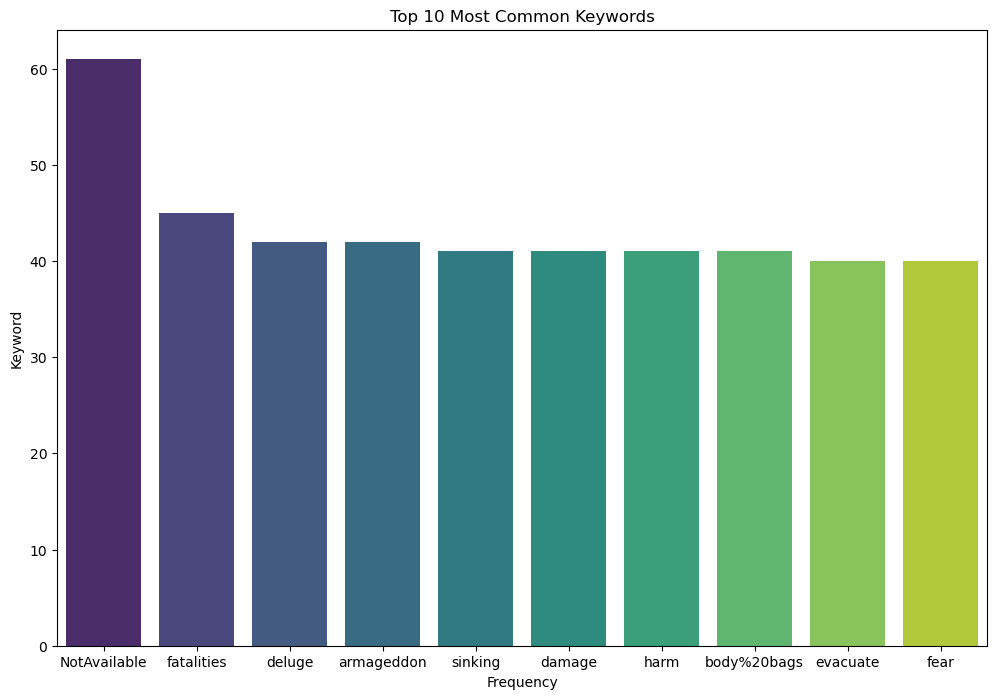

In [37]:
keyword_freq = nlp_data['keyword'].value_counts().head(10)

# Plot the frequency of keywords
plt.figure(figsize=(12, 8))
sns.barplot(x=keyword_freq.index, y=keyword_freq.values, palette='viridis')
plt.title('Top 10 Most Common Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

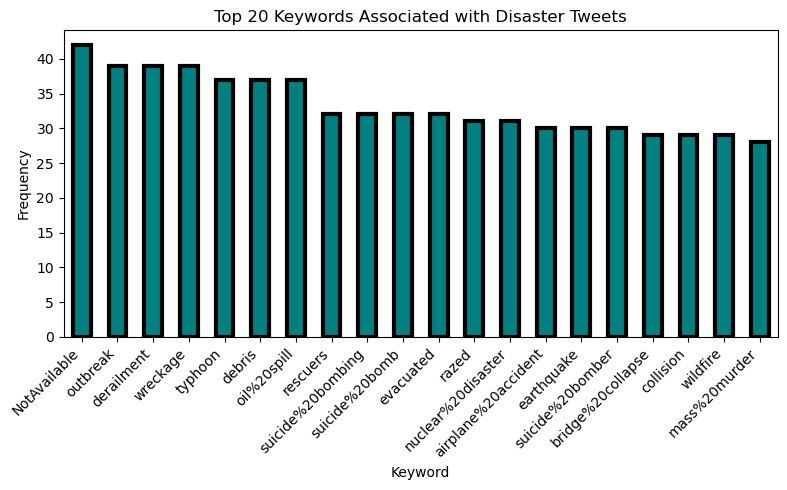

In [38]:
disaster_tweets = nlp_data[nlp_data['target'] == 1]

# Count the frequency of each keyword
keyword_freq = disaster_tweets['keyword'].value_counts().sort_values(ascending=False)

# Plot the top 20 keywords
plt.figure(figsize=(8, 5))
keyword_freq.head(20).plot(kind='bar', color='teal', edgecolor='black', linewidth=3)
plt.title('Top 20 Keywords Associated with Disaster Tweets')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### TF-IDF 

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf_sparse = tfidf_vectorizer.fit_transform(nlp_data['lemmatized_token'])

In [40]:
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names

array(['00', '000', '0000', ..., 'zurich', 'zxathetis', 'zzzz'],
      dtype=object)

In [41]:
for doc_idx, doc in enumerate(X_tfidf_sparse):
    print(f"Document {doc_idx + 1}:")
    # Convert the sparse matrix row to an array
    doc_array = doc.toarray()[0]
    for word_idx, word in enumerate(feature_names):
        tfidf_score = doc_array[word_idx]
        if tfidf_score > 0:
            print(f"  Word: {word}, TF-IDF Score: {tfidf_score:.4f}")

Document 1:
  Word: allah, TF-IDF Score: 0.4248
  Word: deed, TF-IDF Score: 0.4918
  Word: earthquake, TF-IDF Score: 0.3375
  Word: forgive, TF-IDF Score: 0.4918
  Word: may, TF-IDF Score: 0.3038
  Word: reason, TF-IDF Score: 0.3601
Document 2:
  Word: canada, TF-IDF Score: 0.3880
  Word: fire, TF-IDF Score: 0.2203
  Word: forest, TF-IDF Score: 0.3064
  Word: la, TF-IDF Score: 0.3531
  Word: near, TF-IDF Score: 0.3153
  Word: ronge, TF-IDF Score: 0.4914
  Word: sask, TF-IDF Score: 0.4914
Document 3:
  Word: asked, TF-IDF Score: 0.2719
  Word: evacuation, TF-IDF Score: 0.2096
  Word: expected, TF-IDF Score: 0.2517
  Word: notified, TF-IDF Score: 0.3247
  Word: officer, TF-IDF Score: 0.2285
  Word: order, TF-IDF Score: 0.2204
  Word: place, TF-IDF Score: 0.4569
  Word: resident, TF-IDF Score: 0.2760
  Word: shelter, TF-IDF Score: 0.5723
Document 4:
  Word: 000, TF-IDF Score: 0.4463
  Word: 13, TF-IDF Score: 0.3669
  Word: california, TF-IDF Score: 0.2764
  Word: evacuation, TF-IDF Score:

### Sentiment Analysis

In [42]:
%pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
from textblob import TextBlob # type: ignore
import pandas as pd

def get_sentiment(text):
    analysis = TextBlob(text)
    
    # Get polarity value (-1 to 1)
    polarity = analysis.sentiment.polarity
    
    # Classify sentiment
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the dataset
nlp_data['sentiment'] = nlp_data['clean_text'].apply(get_sentiment)

# Display the sentiment distribution
sentiment_distribution = nlp_data['sentiment'].value_counts()
sentiment_distribution

sentiment
neutral     3509
positive    2489
negative    1615
Name: count, dtype: int64

### Sentiment Distribution plot

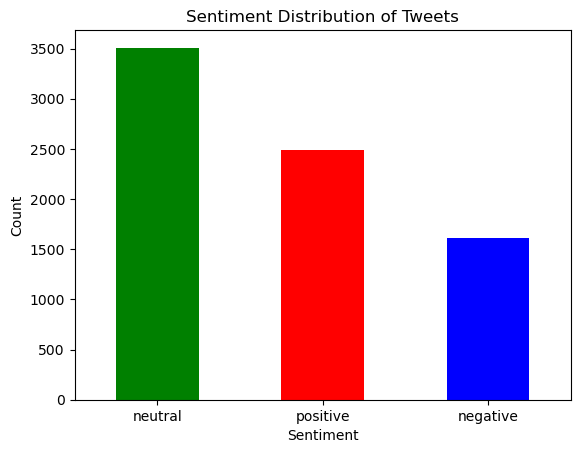

In [44]:
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [45]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


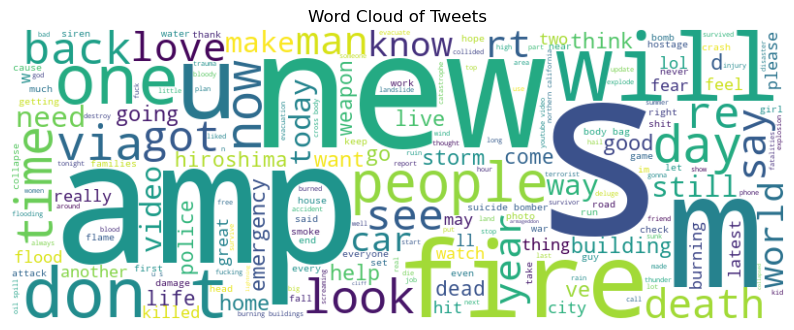

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all clean texts into a single string
all_clean_texts = ' '.join(nlp_data['clean_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=300, background_color='white').generate(all_clean_texts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

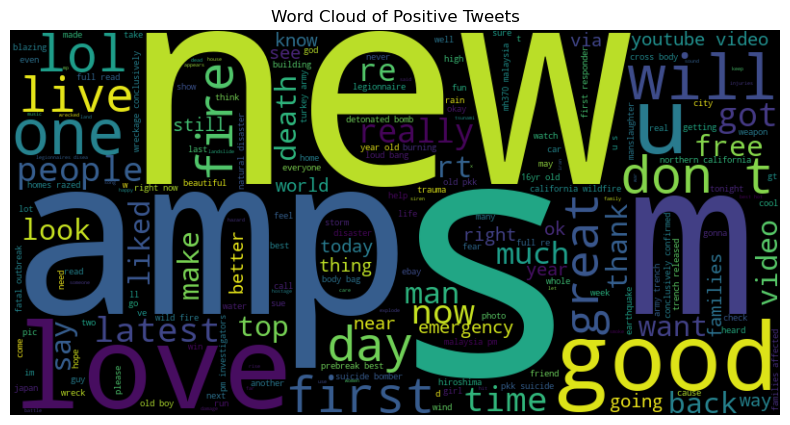

In [47]:
positive_tweets = ' '.join(nlp_data[nlp_data['sentiment'] == 'positive']['clean_text'])
negative_tweets = ' '.join(nlp_data[nlp_data['sentiment'] == 'negative']['clean_text'])
neutral_tweets = ' '.join(nlp_data[nlp_data['sentiment'] == 'neutral']['clean_text'])

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(positive_tweets, 'Word Cloud of Positive Tweets')

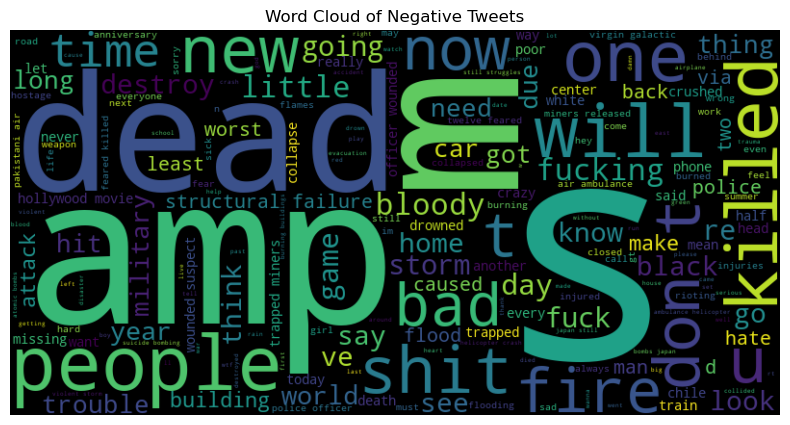

In [48]:
generate_wordcloud(negative_tweets, 'Word Cloud of Negative Tweets')

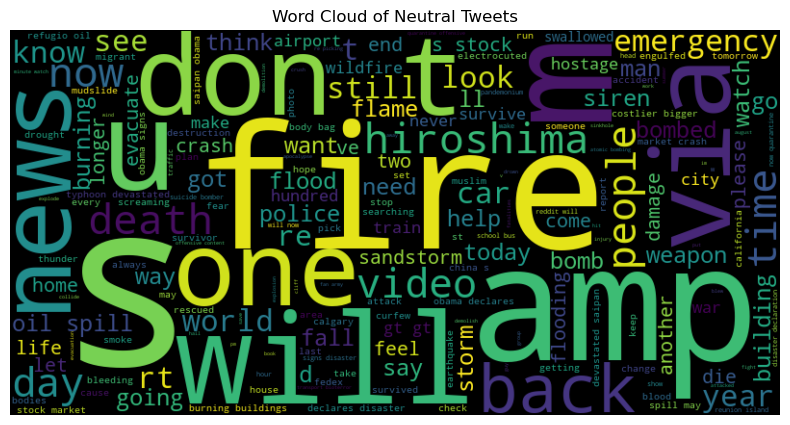

In [49]:
generate_wordcloud(neutral_tweets, 'Word Cloud of Neutral Tweets')

### Word Embeddings Word2Vec

In [50]:
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

In [51]:
warnings.filterwarnings(action= 'ignore')

In [52]:
all_clean_texts = ' '.join(nlp_data['clean_text'])

# Tokenize the clean text into sentences
sentences = nltk.sent_tokenize(all_clean_texts)

# Tokenize each sentence into words
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Train Word2Vec model for clean text
model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=2, workers=4, sg=1, hs=0, negative=10, seed=34)

# Assuming tokenized_tweet is a list of lists containing tokenized tweets
# Assuming nlp_data['clean_text'] contains preprocessed text data
tokenized_tweet = nlp_data['clean_text'].apply(lambda x: x.split())

# Train Word2Vec model for tweets
model_w2v = Word2Vec(vector_size=200, window=5, min_count=2, sg=1, hs=0, negative=10, workers=2, seed=34)
model_w2v.build_vocab(tokenized_tweet, progress_per=10000)
model_w2v.train(tokenized_tweet, total_examples=len(tokenized_tweet), epochs=20)

(1691782, 2219520)

In [53]:
model_w2v.wv.most_similar(positive = "disaster")

[('natural', 0.7805840969085693),
 ('thyroid', 0.6916142106056213),
 ('abcnews', 0.6893425583839417),
 ('increased', 0.689184308052063),
 ('declares', 0.6891482472419739),
 ('saipan', 0.6810588836669922),
 ('declaration', 0.6779007911682129),
 ('devastated', 0.674628734588623),
 ('federal', 0.6699129939079285),
 ('signs', 0.6679670214653015)]

In [54]:
model_w2v.wv.most_similar(positive = "fire")

[('truck', 0.656972348690033),
 ('township', 0.5895577073097229),
 ('alarm', 0.5773428082466125),
 ('wash', 0.5564781427383423),
 ('crews', 0.5349918603897095),
 ('catches', 0.5307047367095947),
 ('acres', 0.5231295228004456),
 ('forest', 0.5130704641342163),
 ('evacuated', 0.5123267769813538),
 ('apartment', 0.5104016065597534)]

In [55]:

model_w2v.wv.most_similar(positive = "people")

[('humaza', 0.5405402779579163),
 ('reflect', 0.532477617263794),
 ('surah', 0.5263749957084656),
 ('others', 0.5037084221839905),
 ('looters', 0.4997464418411255),
 ('etc', 0.49364495277404785),
 ('kaduna', 0.4888640344142914),
 ('incredibly', 0.486677885055542),
 ('wom', 0.48519203066825867),
 ('plenty', 0.48491033911705017)]

In [56]:

model_w2v.wv.most_similar(negative = "emergency")
     

[('no', 0.032763976603746414),
 ('by', 0.015026263892650604),
 ('on', 0.004337851423770189),
 ('god', 0.0026299874298274517),
 ('his', 0.0021420458797365427),
 ('the', 0.0004753787361551076),
 ('back', -0.007226701360195875),
 ('rt', -0.00800893735140562),
 ('did', -0.008282158523797989),
 ('shot', -0.009768379852175713)]

In [57]:

model_w2v.wv.most_similar(negative = "hell")
     

[('former', -0.009910067543387413),
 ('arson', -0.05908127874135971),
 ('co', -0.06537007540464401),
 ('philippines', -0.06998629868030548),
 ('international', -0.07373344153165817),
 ('van', -0.084395632147789),
 ('plot', -0.08592336624860764),
 ('after', -0.08621318638324738),
 ('israel', -0.08989114314317703),
 ('southampton', -0.08990633487701416)]

### Tweet Length

In [58]:
import numpy as np
from gensim.models import Word2Vec

clean_texts = nlp_data['text']

tokenized_texts = [text.split() for text in nlp_data['text']]

# Calculate the length of each tokenized tweet
tweet_lengths = np.array([len(tokens) for tokens in tokenized_texts])

for text, length in zip(nlp_data['text'], tweet_lengths):
    print(f"Text: '{text}' | Tokenized Length: {length}")

Text: 'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all' | Tokenized Length: 13
Text: 'Forest fire near La Ronge Sask. Canada' | Tokenized Length: 7
Text: 'All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected' | Tokenized Length: 22
Text: '13,000 people receive #wildfires evacuation orders in California ' | Tokenized Length: 8
Text: 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ' | Tokenized Length: 16
Text: '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires' | Tokenized Length: 18
Text: '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas' | Tokenized Length: 14
Text: 'I'm on top of the hill and I can see a fire in the woods...' | Tokenized Length: 15
Text: 'There's an emergency evacuation happening now in the building across the street' |

### Presence of Hashtags in Text Columns

In [59]:
import re

def extract_hashtags(text):
    hashtags_pattern = r'#\w+'
    hashtags = re.findall(hashtags_pattern, text)
    return hashtags

hashtags_all = extract_hashtags(" ".join(nlp_data['text']))

if hashtags_all:
    print("All Hashtags found:", hashtags_all)
else:
    print("No hashtags found in the text.")



All Hashtags found: ['#earthquake', '#wildfires', '#Alaska', '#wildfires', '#RockyFire', '#CAfire', '#wildfires', '#flood', '#disaster', '#flooding', '#raining', '#flooding', '#Florida', '#TampaBay', '#Tampa', '#Flood', '#We', '#BREAKING', '#metal', '#RT', '#AFRICANBAZE', '#mufc', '#Bridgetown', '#nsfw', '#nsfw', '#Kurds', '#Diyala', '#California', '#climate', '#energy', '#NowPlaying', '#EDM', '#NashvilleTraffic', '#SantaClara', '#BayArea', '#Traffic', '#personalinjury', '#solicitor', '#OtleyHour', '#stlouis', '#caraccidentlawyer', '#TruckCrash', '#FortWorth', '#Ashville', '#traffic', '#Manchester', '#traffic', '#BREAKING', '#Hagerstown', '#WHAG', '#Bahrain', '#ArrestPastorNganga', '#Dubstep', '#TrapMusic', '#DnB', '#EDM', '#Dance', '#Ices', '#Dubstep', '#TrapMusic', '#DnB', '#EDM', '#Dance', '#Ices', '#GrowingUpSpoiled', '#Dubstep', '#TrapMusic', '#DnB', '#EDM', '#Dance', '#Ices', '#Dubstep', '#TrapMusic', '#DnB', '#EDM', '#Dance', '#Ices', '#Dubstep', '#TrapMusic', '#DnB', '#EDM', '#

All Hashtags found: ['#earthquake', '#wildfires', '#Alaska', '#wildfires', '#RockyFire', '#CAfire', '#wildfires', '#flood', '#disaster', '#flooding', '#raining', '#flooding', '#Florida', '#TampaBay', '#Tampa', '#Flood', '#We', '#BREAKING', '#metal', '#RT', '#AFRICANBAZE', '#mufc', '#Bridgetown', '#nsfw', '#nsfw', '#Kurds', '#Diyala', '#California', '#climate', '#energy', '#NowPlaying', '#EDM', '#NashvilleTraffic', '#SantaClara', '#BayArea', '#Traffic', '#personalinjury', '#solicitor', '#OtleyHour', '#stlouis', '#caraccidentlawyer', '#TruckCrash', '#FortWorth', '#Ashville', '#traffic', '#Manchester', '#traffic', '#BREAKING', '#Hagerstown', '#WHAG', '#Bahrain', '#ArrestPastorNganga', '#Dubstep', '#TrapMusic', '#DnB', '#EDM', '#Dance', '#Ices', '#Dubstep', '#TrapMusic', '#DnB', '#EDM', '#Dance', '#Ices', '#GrowingUpSpoiled', '#Dubstep', '#TrapMusic', '#DnB', '#EDM', '#Dance', '#Ices', '#Dubstep', '#TrapMusic', '#DnB', '#EDM', '#Dance', '#Ices', '#Dubstep', '#TrapMusic', '#DnB', '#EDM', '#

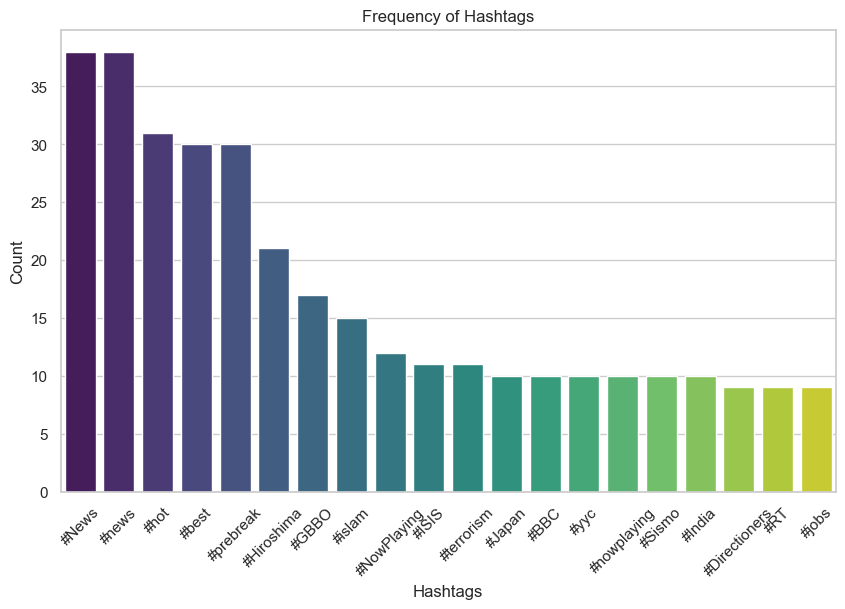

In [60]:
hashtags_all = extract_hashtags(" ".join(nlp_data['text']))

# Check if any hashtags are found
if hashtags_all:
    print("All Hashtags found:", hashtags_all)
    # Plotting the count of hashtags
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    ax = sns.countplot(x=hashtags_all, order=pd.Series(hashtags_all).value_counts().index[:20], palette="viridis")
    ax.set_xlabel('Hashtags')  
    ax.set_ylabel('Count')  
    plt.xticks(rotation=45)  
    plt.title('Frequency of Hashtags')
    plt.show()
else:
    print("No hashtags found in the text.")

### Presence of Hashtags in Clean_text Columns

In [61]:
import re

def extract_hashtags(text):
    hashtags_pattern = r'#\w+'
    hashtags = re.findall(hashtags_pattern, text)
    return hashtags

hashtags_all = extract_hashtags(" ".join(nlp_data['clean_text']))

if hashtags_all:
    print("All Hashtags found:", hashtags_all)
else:
    print("No hashtags found in the text.")

No hashtags found in the text.


### User Mentiones

In [62]:
def user_mentions(text):
    mentions = re.findall(r'@\w+', text)
    return len(mentions) > 0


nlp_data['user_mentions'] = nlp_data['clean_text'].apply(user_mentions)
nlp_data['user_mentions']

0       False
1       False
2       False
3       False
4       False
        ...  
7608    False
7609    False
7610    False
7611    False
7612    False
Name: user_mentions, Length: 7613, dtype: bool

In [63]:
import re
import emoji

# Function to check presence of URLs
def has_urls(text):
    urls = re.findall(r'http\S+|www\S+', text)
    return len(urls) > 0

# Function to count number of exclamation marks
def count_exclamation_marks(text):
    return text.count('!')

# Function to count number of question marks
def count_question_marks(text):
    return text.count('?')

# Function to check presence of emoticons or emoji
def has_emoticons_emoji(text):
    emoticons = re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    emoji_present = any(char in emoji.UNICODE_EMOJI for char in text)
    return len(emoticons) > 0 or emoji_present

# Function to count number of capitalized words
def count_capitalized_words(text):
    words = text.split()
    return sum(1 for word in words if word.isupper())

# Function to calculate average word length
def average_word_length(text):
    words = text.split()
    lengths = [len(word) for word in words]
    return sum(lengths) / len(lengths)

# Function to count number of numeric characters
def count_numeric_characters(text):
    return sum(char.isdigit() for char in text)


In [64]:
# Add presence of URLs feature
nlp_data['has_urls'] = nlp_data['text'].apply(has_urls)


In [65]:
# Add presence of URLs feature
nlp_data['has_urls'] = nlp_data['text'].apply(has_urls)


In [66]:

# Add number of exclamation marks feature
nlp_data['num_exclamation_marks'] = nlp_data['text'].apply(count_exclamation_marks)


In [67]:

# Add number of question marks feature
nlp_data['num_question_marks'] = nlp_data['text'].apply(count_question_marks)


In [68]:
def has_emoticons_emoji(text):
    # Define a regular expression pattern to match emoji
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    # Check if the text contains any emoji
    return bool(emoji_pattern.search(text))

# Add presence of emoticons or emoji feature
nlp_data['has_emoticons_emoji'] = nlp_data['text'].apply(has_emoticons_emoji)

# Display the updated dataset with additional features
print(nlp_data['has_emoticons_emoji'])

0       False
1       False
2       False
3       False
4       False
        ...  
7608    False
7609    False
7610    False
7611    False
7612    False
Name: has_emoticons_emoji, Length: 7613, dtype: bool


In [69]:

# Add number of capitalized words feature
nlp_data['num_capitalized_words'] = nlp_data['text'].apply(count_capitalized_words)


In [70]:

# Add average word length feature
nlp_data['average_word_length'] = nlp_data['text'].apply(average_word_length)


In [71]:

# Add number of numeric characters feature
nlp_data['num_numeric_characters'] = nlp_data['text'].apply(count_numeric_characters)


In [72]:

# Display the updated dataset with additional features
print(nlp_data.head())

   id       keyword location  \
0   1  NotAvailable  Unknown   
1   4  NotAvailable  Unknown   
2   5  NotAvailable  Unknown   
3   6  NotAvailable  Unknown   
4   7  NotAvailable  Unknown   

                                                text  target  \
0  Our Deeds are the Reason of this #earthquake M...       1   
1             Forest fire near La Ronge Sask. Canada       1   
2  All residents asked to 'shelter in place' are ...       1   
3  13,000 people receive #wildfires evacuation or...       1   
4  Just got sent this photo from Ruby #Alaska as ...       1   

  special_characters                                         clean_text  \
0                [#]  our deeds are the reason of this  earthquake m...   
1                [.]             forest fire near la ronge sask  canada   
2          [', ', .]  all residents asked to  shelter in place  are ...   
3             [,, #]  13 000 people receive  wildfires evacuation or...   
4             [#, #]  just got sent this photo 

In [75]:
nlp_data1=nlp_data.copy()

In [77]:
nlp_data1.head(1)

id       keyword location  \
0   1  NotAvailable  Unknown   

                                                text  target  \
0  Our Deeds are the Reason of this #earthquake M...       1   

  special_characters                                         clean_text  \
0                [#]  our deeds are the reason of this  earthquake m...   

                                              tokens  \
0  [deeds, reason, earthquake, may, allah, forgiv...   

                                   lemmatized_tokens  \
0  [deed, reason, earthquake, may, allah, forgive...   

                             lemmatized_token sentiment  user_mentions  \
0  deed reason earthquake may allah forgive u   neutral          False   

   has_urls  num_exclamation_marks  num_question_marks  has_emoticons_emoji  \
0     False                      0                   0                False   

   num_capitalized_words  average_word_length  num_numeric_characters  
0                      1             4.384615                       0

In [79]:
columns_to_drop=[
    'special_characters','sentiment','user_mentions',
    'has_urls','num_exclamation_marks','num_question_marks',
    'has_emoticons_emoji','num_capitalized_words','average_word_length',
    'num_numeric_characters',
]

nlp_data1.drop(columns=columns_to_drop, inplace=True)

In [80]:
nlp_data1.head(1)

id       keyword location  \
0   1  NotAvailable  Unknown   

                                                text  target  \
0  Our Deeds are the Reason of this #earthquake M...       1   

                                          clean_text  \
0  our deeds are the reason of this  earthquake m...   

                                              tokens  \
0  [deeds, reason, earthquake, may, allah, forgiv...   

                                   lemmatized_tokens  \
0  [deed, reason, earthquake, may, allah, forgive...   

                             lemmatized_token  
0  deed reason earthquake may allah forgive u

In [81]:
file_path = 'nlp_data1.csv'
nlp_data1.to_csv(file_path, index=False)